# Determining Dimensionality

<img src='../images/chapter2 2.jpeg' />

## Packages

In [1]:
library(psych)
library(tidyverse)
library(DBI)
library(dbplyr)
library(odbc)
library(GPArotation)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::%+%()   masks psych::%+%()
✖ ggplot2::alpha() masks psych::alpha()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()

Attaching package: ‘dbplyr’

The following objects are masked from ‘package:dplyr’:

    ident, sql



## The Big Five Inventory (BFI) dataset

- 2,800 subjects
- 25 questions
- Data collected from the Synthetic Aperture Personality Assessment (SAPA)

In [2]:
data(bfi)
bfi <- bfi[, 1:25]
bfi

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,⋯,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
61617,2,4,3,4,4,2,3,3,4,4,⋯,3,4,2,2,3,3,6,3,4,3
61618,2,4,5,2,5,5,4,4,3,4,⋯,3,3,3,5,5,4,2,4,3,3
61620,5,4,5,4,4,4,5,4,2,5,⋯,4,5,4,2,3,4,2,5,5,2
61621,4,4,6,5,5,4,4,3,5,5,⋯,2,5,2,4,1,3,3,4,3,5
61622,2,3,3,4,5,4,4,5,3,2,⋯,2,3,4,4,3,3,3,4,3,3
61623,6,6,5,6,5,6,6,6,1,3,⋯,3,5,2,2,3,4,3,5,6,1
61624,2,5,5,3,5,5,4,4,2,3,⋯,1,2,2,1,1,5,2,5,6,1
61629,4,3,1,5,1,3,2,4,2,4,⋯,6,3,2,6,4,3,2,4,5,3
61630,4,3,6,3,3,6,6,3,4,5,⋯,5,5,2,3,3,6,6,6,6,1


In [3]:
str(bfi)

'data.frame':	2800 obs. of  25 variables:
 $ A1: int  2 2 5 4 2 6 2 4 4 2 ...
 $ A2: int  4 4 4 4 3 6 5 3 3 5 ...
 $ A3: int  3 5 5 6 3 5 5 1 6 6 ...
 $ A4: int  4 2 4 5 4 6 3 5 3 6 ...
 $ A5: int  4 5 4 5 5 5 5 1 3 5 ...
 $ C1: int  2 5 4 4 4 6 5 3 6 6 ...
 $ C2: int  3 4 5 4 4 6 4 2 6 5 ...
 $ C3: int  3 4 4 3 5 6 4 4 3 6 ...
 $ C4: int  4 3 2 5 3 1 2 2 4 2 ...
 $ C5: int  4 4 5 5 2 3 3 4 5 1 ...
 $ E1: int  3 1 2 5 2 2 4 3 5 2 ...
 $ E2: int  3 1 4 3 2 1 3 6 3 2 ...
 $ E3: int  3 6 4 4 5 6 4 4 NA 4 ...
 $ E4: int  4 4 4 4 4 5 5 2 4 5 ...
 $ E5: int  4 3 5 4 5 6 5 1 3 5 ...
 $ N1: int  3 3 4 2 2 3 1 6 5 5 ...
 $ N2: int  4 3 5 5 3 5 2 3 5 5 ...
 $ N3: int  2 3 4 2 4 2 2 2 2 5 ...
 $ N4: int  2 5 2 4 4 2 1 6 3 2 ...
 $ N5: int  3 5 3 1 3 3 1 4 3 4 ...
 $ O1: int  3 4 4 3 3 4 5 3 6 5 ...
 $ O2: int  6 2 2 3 3 3 2 2 6 1 ...
 $ O3: int  3 4 5 4 4 5 5 4 6 5 ...
 $ O4: int  4 3 5 3 3 6 6 5 6 5 ...
 $ O5: int  3 3 2 5 3 1 1 3 1 2 ...


In [4]:
describe(bfi)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1,1,2784,2.413434,1.407737,2,2.230251,1.4826,1,6,5,0.82504356,-0.30763947,0.02668007
A2,2,2773,4.802380,1.172020,5,4.977017,1.4826,1,6,5,-1.12428533,1.05483862,0.02225666
A3,3,2774,4.603821,1.301834,5,4.788288,1.4826,1,6,5,-0.99845684,0.44204096,0.02471737
A4,4,2781,4.699748,1.479633,5,4.932584,1.4826,1,6,5,-1.03094275,0.04045252,0.02805779
A5,5,2784,4.560345,1.258512,5,4.711849,1.4826,1,6,5,-0.84723335,0.15890562,0.02385189
C1,6,2779,4.502339,1.241347,5,4.640899,1.4826,1,6,5,-0.85470158,0.30442934,0.02354771
C2,7,2776,4.369957,1.318347,5,4.502250,1.4826,1,6,5,-0.74181968,-0.13643987,0.02502188
C3,8,2780,4.303957,1.288552,5,4.417716,1.4826,1,6,5,-0.69145540,-0.13233095,0.02443878
C4,9,2774,2.553353,1.375118,2,2.413514,1.4826,1,6,5,0.59617294,-0.62141881,0.02610879


<img src='../images/chapter2 4.jpeg' />

<img src='../images/chapter2 5.jpeg' />

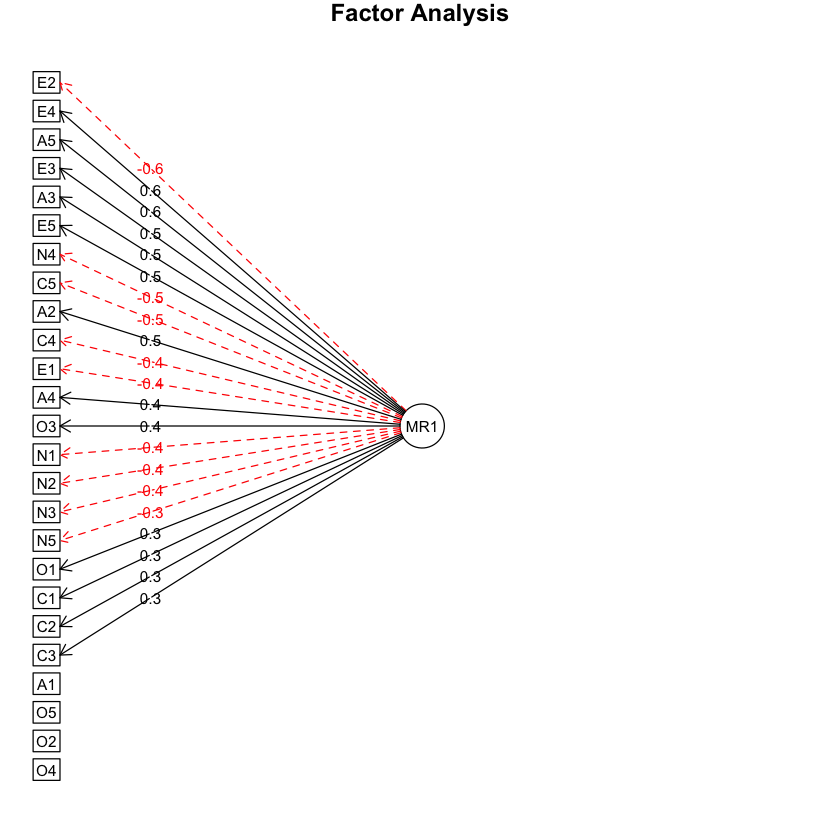

In [5]:
par(bg='white')
bfi_model <- fa(bfi)
fa.diagram(bfi_model)

In [6]:
head(bfi)

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,⋯,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
61617,2,4,3,4,4,2,3,3,4,4,⋯,3,4,2,2,3,3,6,3,4,3
61618,2,4,5,2,5,5,4,4,3,4,⋯,3,3,3,5,5,4,2,4,3,3
61620,5,4,5,4,4,4,5,4,2,5,⋯,4,5,4,2,3,4,2,5,5,2
61621,4,4,6,5,5,4,4,3,5,5,⋯,2,5,2,4,1,3,3,4,3,5
61622,2,3,3,4,5,4,4,5,3,2,⋯,2,3,4,4,3,3,3,4,3,3
61623,6,6,5,6,5,6,6,6,1,3,⋯,3,5,2,2,3,4,3,5,6,1


In [8]:
# Establish two sets of indices to split the dataset
N <- nrow(bfi)
indices <- seq(1, N)
indices_EFA <- sample(indices, floor((.5*N)))
indices_CFA <- indices[!(indices %in% indices_EFA)]

# Use those indices to split the dataset into halves for your EFA and CFA
bfi_EFA <- bfi[indices_EFA, ]
bfi_CFA <- bfi[indices_CFA, ]

In [9]:
head(bfi_EFA)

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,⋯,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
62225,2,5,6,5,4,3,5,5,2,1,⋯,6,6,6,6,4,4,2,6,6,2
62594,2,6,NA,5,5,6,5,6,2,3,⋯,2,3,4,1,2,6,6,5,4,2
64456,2,4,3,3,5,4,2,4,4,4,⋯,4,5,2,3,3,4,3,4,5,4
63580,1,4,4,5,4,3,4,3,5,4,⋯,5,3,4,4,4,6,4,4,4,5
66244,1,6,5,6,5,4,4,5,2,3,⋯,1,1,1,1,3,4,3,4,5,2
64020,1,6,6,6,NA,6,2,6,1,2,⋯,1,2,6,1,4,6,1,2,6,5


In [10]:
head(bfi_CFA)

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,⋯,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
61617,2,4,3,4,4,2,3,3,4,4,⋯,3,4,2,2,3,3,6,3,4,3
61618,2,4,5,2,5,5,4,4,3,4,⋯,3,3,3,5,5,4,2,4,3,3
61620,5,4,5,4,4,4,5,4,2,5,⋯,4,5,4,2,3,4,2,5,5,2
61621,4,4,6,5,5,4,4,3,5,5,⋯,2,5,2,4,1,3,3,4,3,5
61622,2,3,3,4,5,4,4,5,3,2,⋯,2,3,4,4,3,3,3,4,3,3
61634,4,4,5,6,5,4,3,5,3,2,⋯,3,3,4,2,3,5,3,5,6,3


# An Empirical Approach to Dimensionality

Without a theory, we can use Eigenvalues to discover factors.

<img src='../images/chapter2 7.jpeg' />

## 1. Calculate the correlation matrix first 

In [11]:

bfi_efa_cor <- cor(bfi_EFA, use = "pairwise.complete.obs")

In [12]:
bfi_efa_cor

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,⋯,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
A1,1.00000000,-0.316754063,-0.236607172,-0.135490618,-0.145118371,0.041040500,0.027436711,-0.014860288,0.12350434,0.05265270,⋯,0.161887309,0.13500542,0.06895859,0.03133043,0.029303979,0.03149221,0.088218313,-0.05556581,-0.085675431,0.127652673
A2,-0.31675406,1.000000000,0.460824953,0.282657820,0.361907375,0.060343784,0.127452756,0.155595482,-0.14405043,-0.12275536,⋯,-0.118885720,-0.06499137,-0.05791213,-0.08007928,0.008724790,0.09636808,-0.008316445,0.15308627,0.094375322,-0.139214043
A3,-0.23660717,0.460824953,1.000000000,0.342691473,0.481162490,0.092491639,0.147107326,0.113880319,-0.12485899,-0.16430282,⋯,-0.087197499,-0.08993513,-0.05741114,-0.13140166,-0.041470290,0.12094481,-0.005910974,0.21189487,0.028960536,-0.074453600
A4,-0.13549062,0.282657820,0.342691473,1.000000000,0.279276429,0.070789259,0.243896530,0.089492316,-0.15370955,-0.22101287,⋯,-0.085485540,-0.12895141,-0.08152317,-0.13864200,-0.007806876,0.04810260,0.016028486,0.07004681,-0.020308699,-0.009054266
A5,-0.14511837,0.361907375,0.481162490,0.279276429,1.000000000,0.132961054,0.133868548,0.136572875,-0.12976107,-0.16419478,⋯,-0.192760474,-0.17431331,-0.13676684,-0.18131406,-0.086526080,0.14128748,0.003071072,0.20970487,0.015646450,-0.062524501
C1,0.04104050,0.060343784,0.092491639,0.070789259,0.132961054,1.000000000,0.431331195,0.282670442,-0.33977442,-0.26023852,⋯,-0.027837112,-0.01102695,0.01043237,-0.07086743,-0.041828395,0.17901093,-0.112392521,0.20436175,0.148118048,-0.103041470
C2,0.02743671,0.127452756,0.147107326,0.243896530,0.133868548,0.431331195,1.000000000,0.347642518,-0.37686006,-0.30375394,⋯,0.026355382,0.03994474,0.04219307,-0.01309380,0.070676944,0.18841012,-0.033434560,0.23417017,0.081346147,-0.046346019
C3,-0.01486029,0.155595482,0.113880319,0.089492316,0.136572875,0.282670442,0.347642518,1.000000000,-0.29214335,-0.33460495,⋯,-0.052519088,-0.03489099,-0.05763724,-0.11991068,-0.005891557,0.09531167,0.001616963,0.05755976,0.008039655,-0.006103041
C4,0.12350434,-0.144050427,-0.124858990,-0.153709546,-0.129761073,-0.339774417,-0.376860056,-0.292143347,1.00000000,0.46745145,⋯,0.175440543,0.11255362,0.16863111,0.20016991,0.185830921,-0.08328999,0.198300890,-0.09483745,0.031240641,0.209461034
C5,0.05265270,-0.122755360,-0.164302819,-0.221012872,-0.164194783,-0.260238515,-0.303753937,-0.334604946,0.46745145,1.00000000,⋯,0.192528073,0.22766963,0.22234627,0.32990986,0.182497688,-0.07224641,0.116185816,-0.10033879,0.137957335,0.047228045


## 2. Calculate Eigenvalues

In [13]:
eigenvals <- eigen(bfi_efa_cor)
eigenvals$values

[1] 4.8970028 2.7638125 2.0385896 1.7837433 1.5908521 1.1495316 0.8738146
 [8] 0.8202849 0.7623008 0.7302935 0.6983460 0.6650349 0.6432595 0.6092242
[15] 0.5714583 0.5585427 0.5245602 0.4973811 0.4872767 0.4553728 0.4397364
[22] 0.4192603 0.3855219 0.3575005 0.2772988

## 3. Create Scree Plot to Determine Number of Factors

### A. Eigenvalues in BFI Dataset

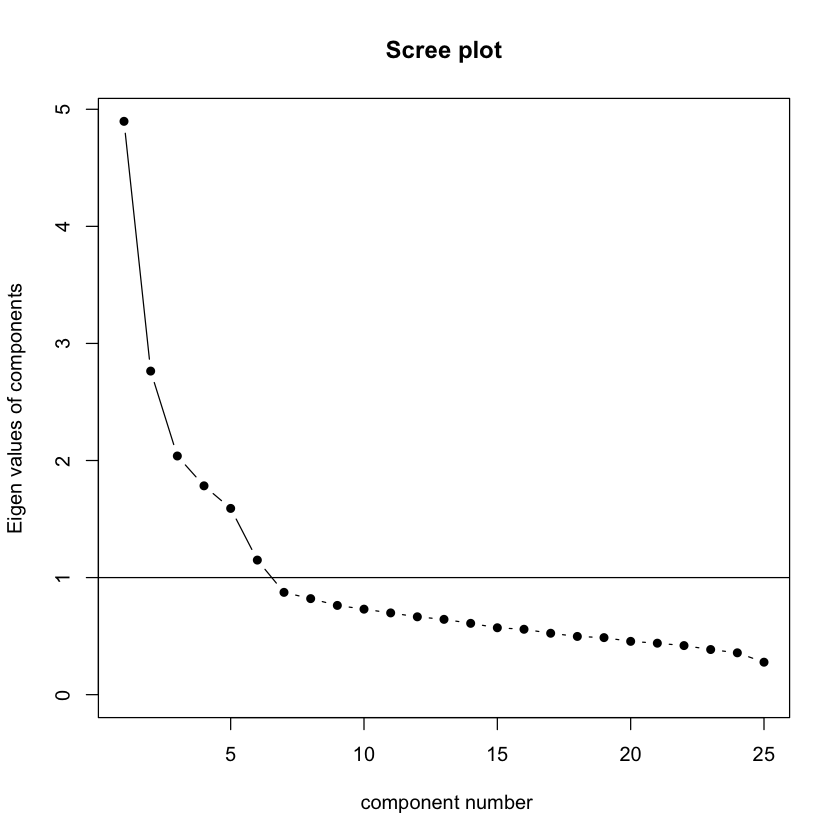

In [14]:
par(bg = 'white')
scree(bfi_efa_cor, factors=F)

### B. Eigenvalues in UFC Dataset

In [15]:
con <- dbConnect(
    RPostgres::Postgres(),
    dbname = 'ufc'
)

In [16]:
ufc <- dbReadTable(con, 'wrangled_ufc_fights')
ufc <- ufc %>%
    filter(outcome == 'W')
ufc <- ufc[, c('body', 
        'body_attempts', 
        'clinch', 
        'clinch_attempts', 
        'distance',
        'distance_attempts',
        'ground',
        'ground_attempts',
        'head',
        'head_attempts',
        'knockdowns',
        'leg',
        'leg_attempts',
        'pass',
        'reversals',
        'sig_attempts',
        'sig_strikes',
        'strike_attempts',
        'strikes',
        'sub_attempts',
        'takedowns',
        'td_attempts')]
ufc <- ufc[complete.cases(ufc), ]

In [17]:
str(ufc)

'data.frame':	5090 obs. of  22 variables:
 $ body             : int  0 3 0 0 1 0 0 0 0 1 ...
 $ body_attempts    : int  0 4 0 0 1 0 1 0 0 1 ...
 $ clinch           : int  0 4 0 0 0 0 0 0 1 1 ...
 $ clinch_attempts  : int  0 9 0 0 0 0 0 0 1 1 ...
 $ distance         : int  1 4 0 0 5 0 3 0 0 0 ...
 $ distance_attempts: int  3 10 3 0 8 0 9 1 0 0 ...
 $ ground           : int  2 7 0 1 6 0 0 1 0 0 ...
 $ ground_attempts  : int  2 8 0 1 9 0 0 1 0 0 ...
 $ head             : int  3 12 0 1 7 0 3 1 1 0 ...
 $ head_attempts    : int  5 23 1 1 13 0 7 1 1 0 ...
 $ knockdowns       : int  0 2 0 0 1 0 0 0 0 0 ...
 $ leg              : int  0 0 0 0 3 0 0 0 0 0 ...
 $ leg_attempts     : int  0 0 2 0 3 0 1 1 0 0 ...
 $ pass             : int  0 0 2 0 0 2 1 2 1 0 ...
 $ reversals        : int  0 0 0 0 0 1 0 0 0 0 ...
 $ sig_attempts     : int  5 27 3 1 17 0 9 2 1 1 ...
 $ sig_strikes      : int  3 15 0 1 11 0 3 1 1 1 ...
 $ strike_attempts  : int  5 53 7 4 17 12 9 4 2 1 ...
 $ strikes          : int  3 

In [18]:
describe(ufc)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
body,1,5090,7.3968566,8.3569458,5,5.90422397,5.9304,0,92,92,2.139773,7.4564912,0.117135543
body_attempts,2,5090,10.4033399,11.4644267,7,8.40913556,8.8956,0,101,101,2.055846,6.3912693,0.160691702
clinch,3,5090,6.1958743,8.6694694,3,4.41404715,4.4478,0,95,95,2.793029,12.0632174,0.121516046
clinch_attempts,4,5090,8.8622790,11.8597826,5,6.48379175,7.4130,0,115,115,2.671604,10.8368232,0.166233227
distance,5,5090,24.2473477,27.1656765,15,19.38826130,17.7912,0,281,281,2.043623,6.3440512,0.380769044
distance_attempts,6,5090,61.8131631,65.4255134,39,50.55771120,45.9606,0,479,479,1.661900,3.1878990,0.917039934
ground,7,5090,8.4096267,11.3347823,4,6.09847741,5.9304,0,100,100,2.539186,9.1217660,0.158874535
ground_attempts,8,5090,12.3082515,16.5201685,6,8.90471513,8.8956,0,136,136,2.423498,7.8391291,0.231555756
head,9,5090,25.6766208,21.9112060,20,22.58914538,17.7912,0,244,244,1.812798,6.0338318,0.307119499


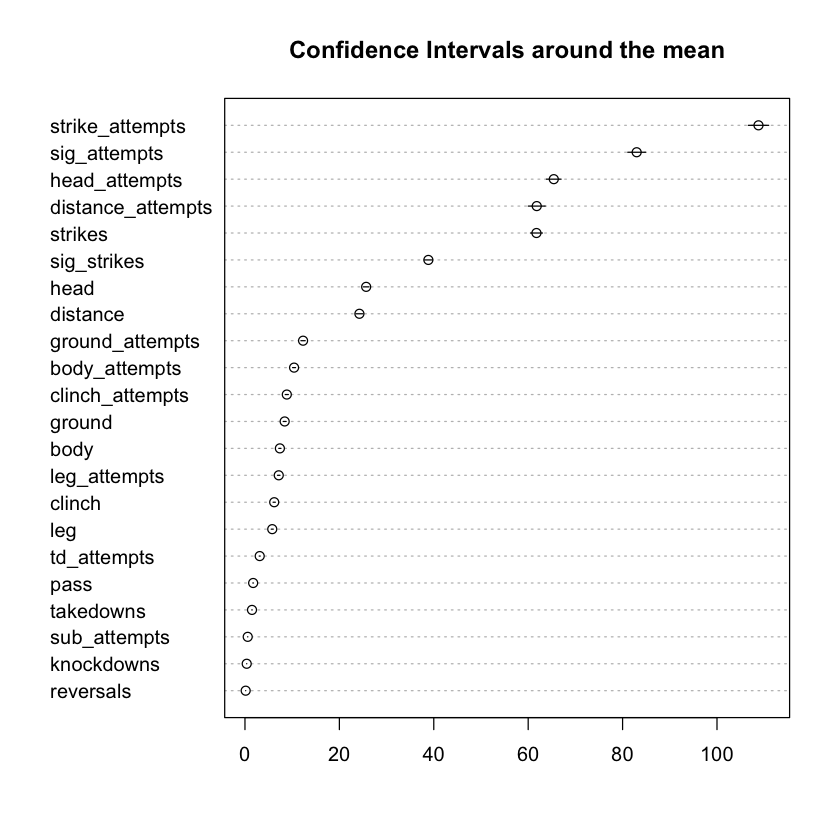

In [19]:
par(bg = 'white')
error.dots(ufc)

In [20]:
ufc_cor <- cor(ufc)

In [21]:
lowerCor(ufc)

                  body  bdy_t clnch clnc_ dstnc dstn_ grond grnd_ head  hd_tt
body               1.00                                                      
body_attempts      0.96  1.00                                                
clinch             0.59  0.52  1.00                                          
clinch_attempts    0.57  0.52  0.97  1.00                                    
distance           0.62  0.67  0.25  0.27  1.00                              
distance_attempts  0.57  0.65  0.22  0.26  0.94  1.00                        
ground             0.09  0.02  0.02  0.00 -0.16 -0.18  1.00                  
ground_attempts    0.06  0.01  0.00  0.00 -0.17 -0.17  0.97  1.00            
head               0.52  0.52  0.38  0.40  0.80  0.75  0.32  0.30  1.00      
head_attempts      0.54  0.59  0.31  0.35  0.87  0.94  0.09  0.11  0.89  1.00
knockdowns        -0.10 -0.10 -0.07 -0.07 -0.02 -0.05 -0.07 -0.06 -0.03 -0.06
leg                0.40  0.45  0.31  0.30  0.60  0.56 -0.08 -0.0

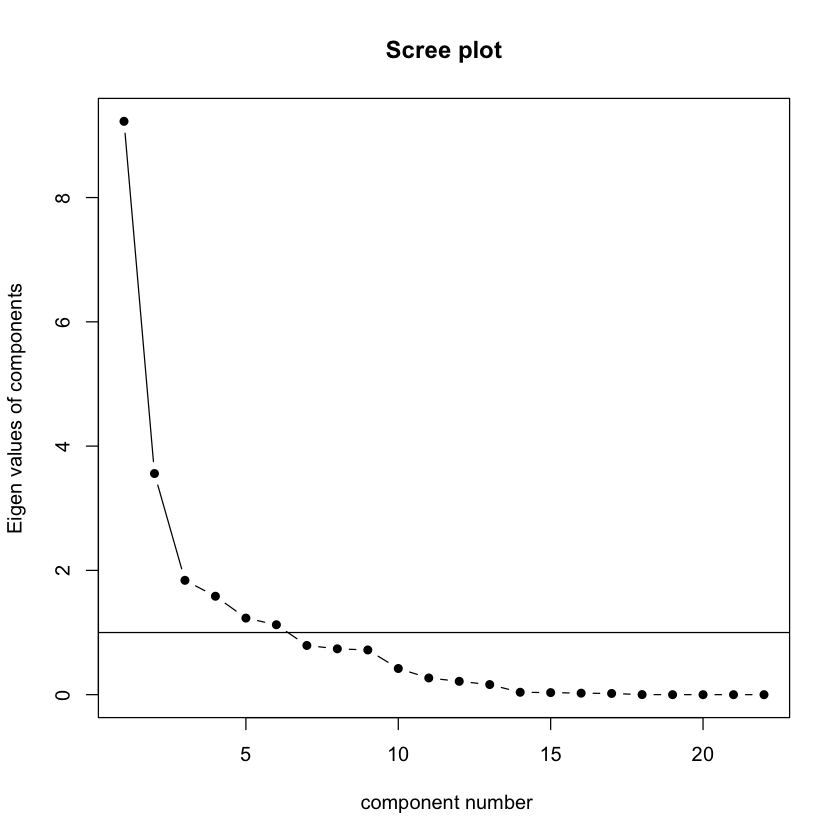

In [22]:
par(bg = 'white')
scree(ufc_cor, factors = F)

# Understanding Multidimensional Data

## Factors = Constructs

**Construct**: an attribute of interest
- Can't be directly measured
- Examples:
    - Self-determination
    - Reasoning ability
    - Political affiliation
    - Extraversion

Factors are the mathematical counterparts of constructs. They provide justification for our theories.

<img src='../images/chapter2 15.jpeg' />

## Interpreting Exploratory Analyses

In the absence of a hypothesized theory, we use Eigenvalue to guide our exploration.

<img src='../images/chapter2 17.jpeg' />

## Interpreting Confirmatory Analyses

During confirmatory factor analysis, we confirm the strength of hypothesized relationships between constructs and the items they were designed to measure.

<img src='../images/chapter2 16.jpeg' />

## Running a Multidimensional EFA

### BFI Factor Diagram

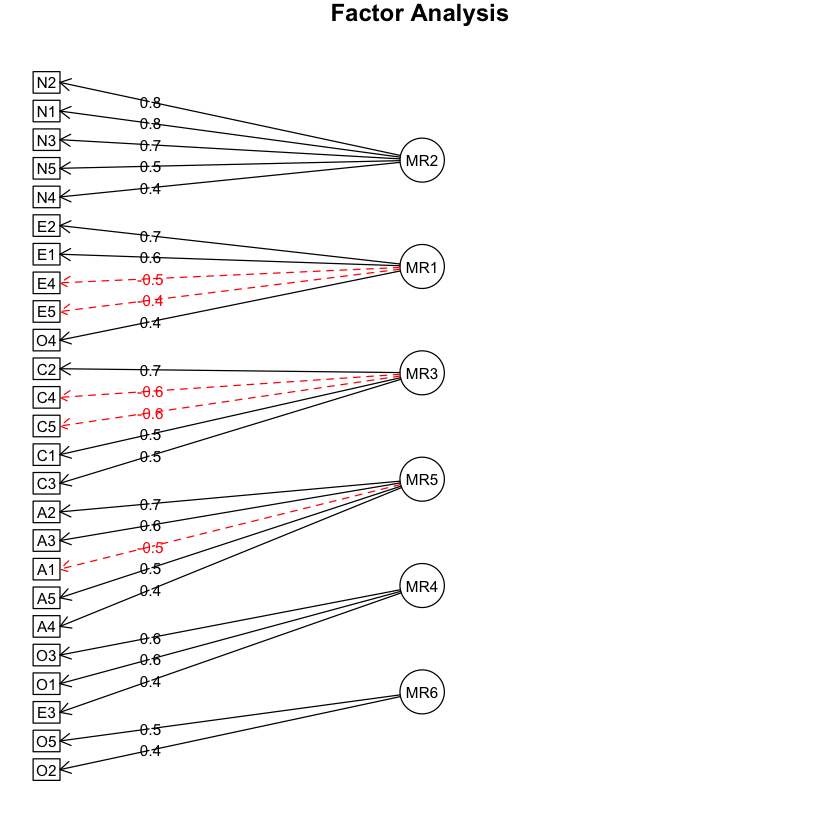

In [23]:
# Run the EFA with six factors (as indicated by your scree plot)
par(bg = 'white')
EFA_model <- fa(bfi_EFA, nfactors = 6)
fa.diagram(EFA_model)

In [ ]:
EFA_model

Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”Warning message in fac(r = r, nfactors = nfactors, n.obs = n.obs, rotate = rotate, :
“ A loading greater than abs(1) was detected.  Examine the loadings carefully.”Warning message in cor.smooth(r):
“Matrix was not positive definite, smoothing was done”Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
“The estimated weights for the factor scores are probably incorrect.  Try a different factor extraction method.”In factor.scores, the correlation matrix is singular, an approximation is used
Warning message in cor.smooth(r):
“Matrix was not positive definite, smoothing was done”

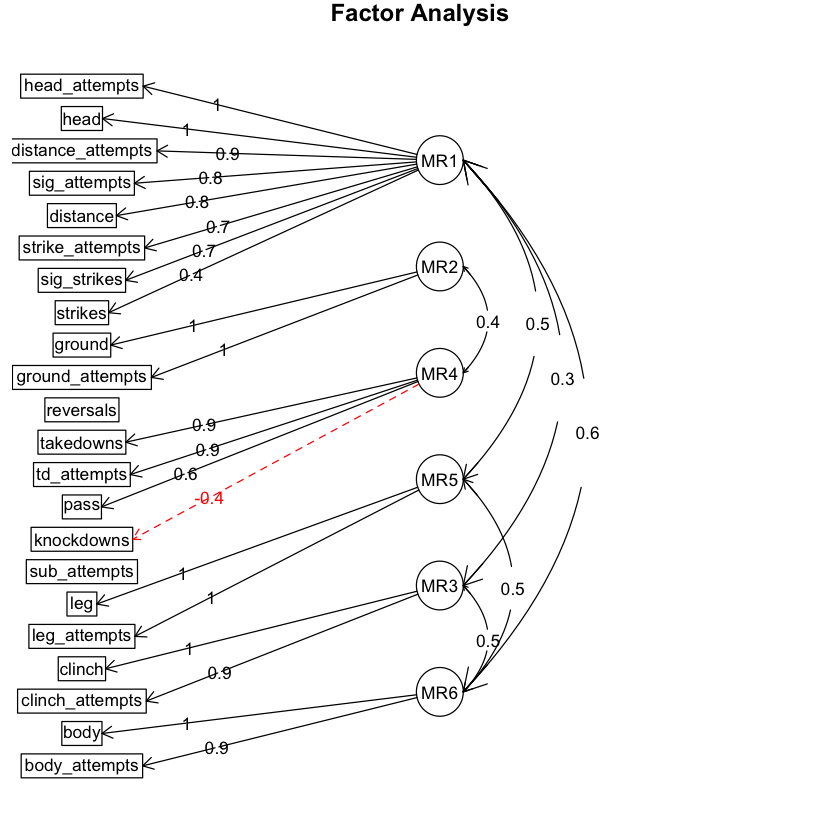

In [24]:
par(bg = 'white')
ufc_norm <- as.data.frame(scale(ufc))
ufc_model <- fa(ufc, nfactors=6)
fa.diagram(ufc_model)

## Factor Loadings

In [25]:
EFA_model$loadings


Loadings:
   MR2    MR1    MR3    MR5    MR4    MR6   
A1                      -0.512  0.108  0.296
A2                       0.658              
A3        -0.107         0.615              
A4                0.178  0.382         0.124
A5 -0.153 -0.167         0.453  0.138  0.211
C1                0.542         0.218       
C2         0.154  0.674         0.147  0.153
C3                0.515                     
C4               -0.642                0.291
C5  0.150  0.193 -0.564         0.125       
E1 -0.147  0.590        -0.115              
E2         0.666                            
E3        -0.317         0.159  0.449  0.163
E4        -0.526         0.238         0.291
E5  0.146 -0.405  0.241         0.255       
N1  0.823 -0.113                            
N2  0.829                                   
N3  0.675  0.153                            
N4  0.441  0.422 -0.124                     
N5  0.450  0.241         0.169         0.179
O1                              0.567       

In [26]:
ufc_model$loadings


Loadings:
                  MR1    MR2    MR4    MR5    MR3    MR6   
body                                                  0.979
body_attempts                                         0.908
clinch                                         0.970       
clinch_attempts                                0.938       
distance           0.800 -0.196         0.155 -0.122  0.168
distance_attempts  0.881 -0.255         0.106 -0.143  0.120
ground                    0.989                            
ground_attempts           0.956                            
head               0.966  0.222        -0.118  0.149       
head_attempts      1.021                                   
knockdowns                      -0.371               -0.127
leg                                     1.003              
leg_attempts                            0.995              
pass              -0.113  0.301  0.550        -0.139       
reversals                 0.122                            
sig_attempts       0.847     

## Factor Scores

Each column represents the factor score for each construct. We do not want to interpret factor scores until we have a theory, however. Once we have a working theory, we can start making inferences about our constructs.

In [27]:
head(EFA_model$scores)

,MR2,MR1,MR3,MR5,MR4,MR6
62225,1.8522900,1.08905106,0.49509590,0.2944034,0.4009310,-0.8055290
62594,NA,NA,NA,NA,NA,NA
64456,0.3426582,-0.34745062,-1.23281395,-0.8065916,-0.8343178,-0.1116425
63580,0.6383134,-0.52279849,-1.21669509,-0.1892002,-0.1793151,1.1136993
66244,-1.5922311,-0.06841385,0.02391415,0.7702281,-0.9053977,-0.3714144
64020,NA,NA,NA,NA,NA,NA


# Investigating Model Fit

## Absolute vs. relative model fit

**Absolute** fit statistics have intrinsic meaning and suggested cutoff values.
- Chi-square test
- Tucker-Lewis Index (TLI)
- Root Mean Square Error of Approximation (RMSEA)

**Relative** fit statistics only have meaning when comparing models.
- Bayesian Information Criterion (BIC)


## Absolute Fit Statistics

Commonly used cutoff values:
- Chi-square test: Non-significant result
- Tucker Lewis Index (TLI): > 0.90
- Root Mean Square Error of Approximation (RMSEA): < 0.05

## Finding the fit statistics

Our model passes 2 of the three of the absolute tests:
- Chi-square p-value = 4.2e-55 <<< .05 (bad)
- TLI = .911 > .9 (good)
- RMSEA = .045 < .05 (good)

The relative fit test will be discussed later:
- BIC = -567.82

## Relative Model Fit

In [31]:
# Run each theorized EFA on your dataset
bfi_theory <- fa(bfi_EFA, nfactors = 5)
bfi_eigen <- fa(bfi_EFA, nfactors = 6)

bfi_theory$BIC
bfi_eigen$BIC

[1] -307.9623

[1] -567.8196

In [28]:
EFA_model

Factor Analysis using method =  minres
Call: fa(r = bfi_EFA, nfactors = 6)
Standardized loadings (pattern matrix) based upon correlation matrix
     MR2   MR1   MR3   MR5   MR4   MR6   h2   u2 com
A1  0.07 -0.09  0.05 -0.51  0.11  0.30 0.31 0.69 1.9
A2  0.02 -0.03  0.06  0.66 -0.01 -0.09 0.45 0.55 1.1
A3 -0.03 -0.11  0.04  0.61  0.06  0.09 0.49 0.51 1.1
A4 -0.06 -0.06  0.18  0.38 -0.08  0.12 0.24 0.76 1.9
A5 -0.15 -0.17  0.03  0.45  0.14  0.21 0.45 0.55 2.2
C1  0.01  0.09  0.54 -0.06  0.22  0.06 0.36 0.64 1.4
C2  0.09  0.15  0.67  0.04  0.15  0.15 0.52 0.48 1.4
C3  0.01  0.02  0.51  0.05 -0.04  0.08 0.27 0.73 1.1
C4  0.03  0.09 -0.64 -0.07  0.10  0.29 0.54 0.46 1.5
C5  0.15  0.19 -0.56 -0.01  0.12  0.03 0.44 0.56 1.5
E1 -0.15  0.59  0.09 -0.12 -0.09  0.09 0.39 0.61 1.4
E2  0.07  0.67 -0.03 -0.09 -0.08  0.05 0.55 0.45 1.1
E3  0.00 -0.32  0.00  0.16  0.45  0.16 0.49 0.51 2.4
E4 -0.04 -0.53  0.02  0.24  0.06  0.29 0.56 0.44 2.1
E5  0.15 -0.41  0.24  0.04  0.25  0.03 0.40 0.60 2.8
N1  0.82

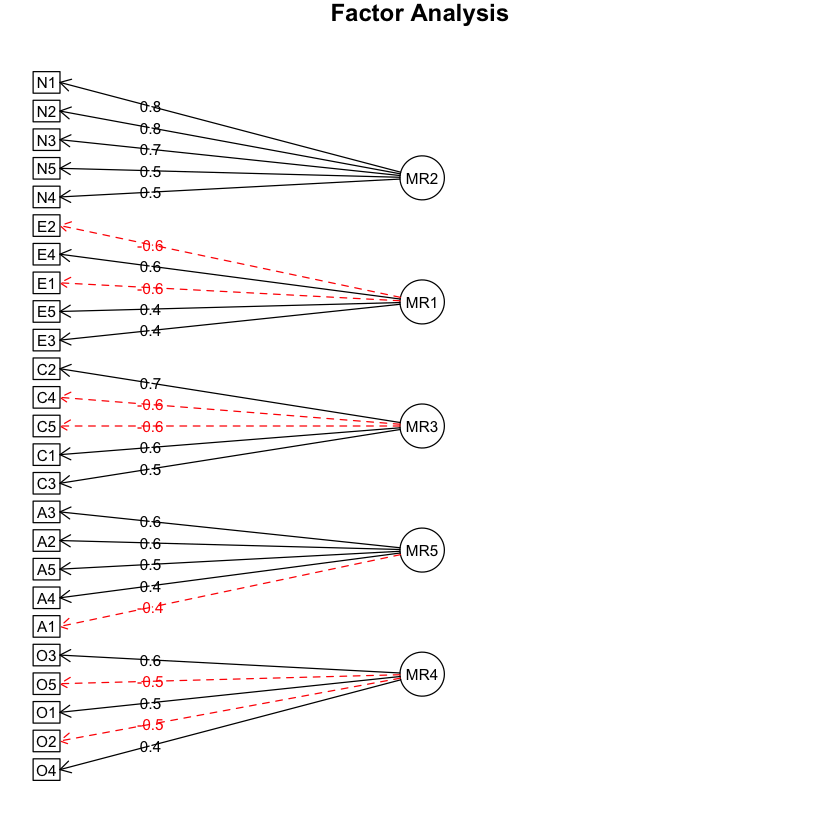

In [30]:
par(bg = 'white')
test_model <- fa(r = bfi_EFA, nfactors = 5)
fa.diagram(test_model)